<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/DailyChallenge_wee3_day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly.express as px


In [ ]:


df = pd.read_excel('/content/US Superstore data.xls')


df.head()



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#Preprocessing

In [ ]:
df.isnull().sum()# check missing values

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum() # check dublicates
df[df.duplicated()]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


#Data Visualization with Matplotlib

In [ ]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:
df['Year'] = df['Order Date'].dt.year # extract year from order date

In [ ]:
sales_trends = df.groupby("Year")["Sales"].sum().reset_index()

In [ ]:
fig = px.line(sales_trends, x="Year", y="Sales", markers=True, title="Sales Trends ")


fig.show()


In [ ]:
sales_trends = df.groupby("Year")["Sales"].sum()
print(sales_trends)

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


Sales went down a little in 2015, but then they went up a lot in 2016 and 2017
Bisness is  is growing

In [ ]:
sales_by_country = df.groupby("Country")["Sales"].sum().reset_index()


fig = px.choropleth(
    sales_by_country,
    locations="Country",
    locationmode="country names",
    color="Sales",
    hover_name="Country",
    color_continuous_scale="Blues"
)

# Show the map
fig.show()


In [ ]:
import os
import geopandas as gpd

# Set config option to restore missing .shx file
os.environ["SHAPE_RESTORE_SHX"] = "YES"

# Read the shapefile
world = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

# Check if it loaded correctly
print(world.head())


        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

# Data Visualization with Seaborn

Use Seaborn to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


In [ ]:
sales_by_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
sales_by_products_df = sales_by_products.reset_index()



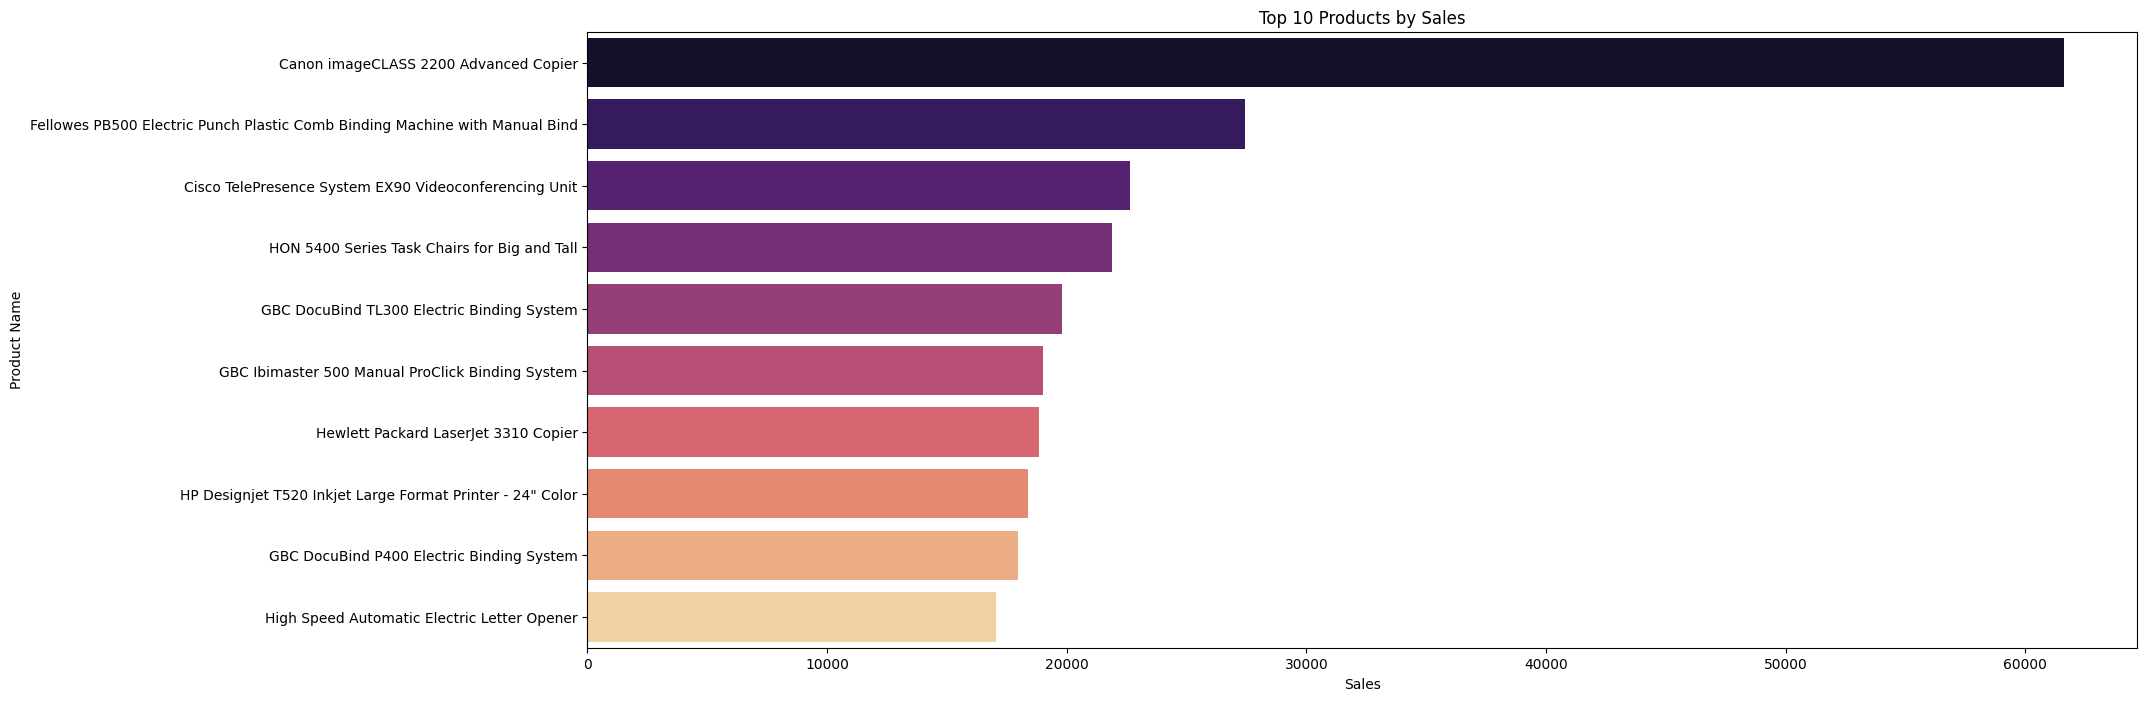

In [ ]:
sales_by_products_df = sales_by_products.reset_index()

# creat plot
plt.figure(figsize=(20, 8))
sns.barplot(x="Sales", y="Product Name", data=sales_by_products_df, palette="magma", hue="Product Name", legend=False)
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.show()






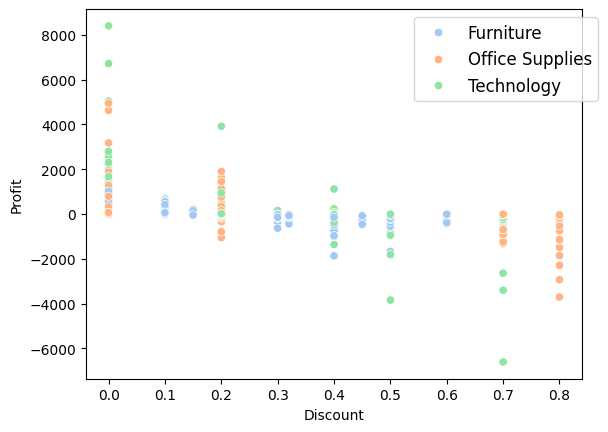

In [ ]:


sns.scatterplot(data=df, x="Discount", y="Profit", hue="Category", palette="pastel")


plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper right')



Matplotlib when you need full control , Seaborn for quick, beautiful, and insightful statistical plots